### Importações

In [10]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Lendo a planilha

In [11]:
df = pd.read_excel('BankChurners.xlsx')
display(df.head())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061,0.934480,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105,0.568610,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000,0.210810,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2175.0,816,28,2.5,0.000,0.216760,0.99998


#### Filtrando o dataframe por sexo

In [12]:
# Filtrar dados para cada sexo
df_homens = df[df['Gender'] == 'M']
df_mulheres = df[df['Gender'] == 'F']

#### Criando um subplot de Histogramas com a idade dos clientes por sexo

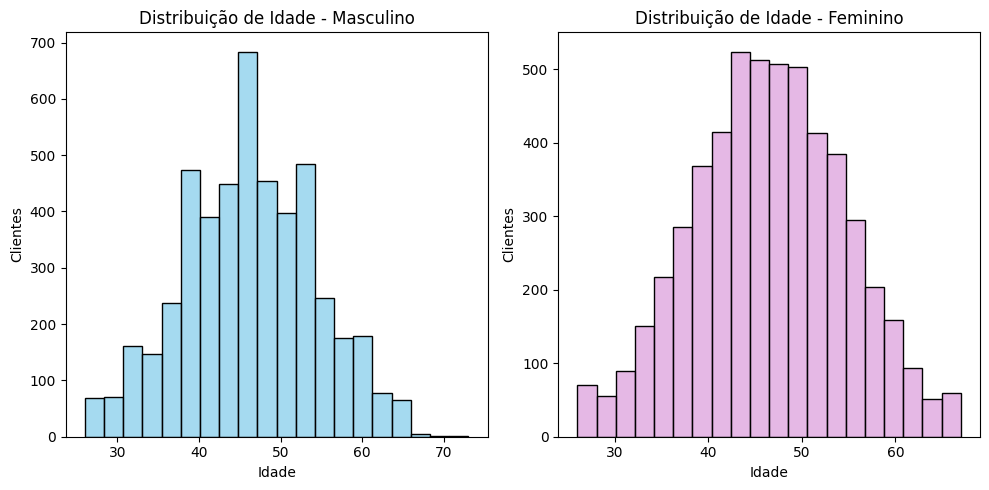

In [33]:
# Criar histogramas
plt.figure(figsize=(10, 5))

# Criando o subplot na primeira posição da matriz
plt.subplot(1, 2, 1)

# Fazendo um histograma com a idade dos clientes do sexo masculino
sns.histplot(df_homens['Customer_Age'], bins=20, color='skyblue')
plt.title('Distribuição de Idade - Masculino')
plt.xlabel('Idade')
plt.ylabel('Clientes')

# Criando o subplot na segunda posição da matriz
plt.subplot(1, 2, 2)

# Fazendo um histograma com a idade dos clientes do sexo feminino
sns.histplot(df_mulheres['Customer_Age'], bins=20, color='plum')
plt.title('Distribuição de Idade - Feminino')
plt.xlabel('Idade')
plt.ylabel('Clientes')

# Mostrando o subplot
plt.tight_layout()
plt.show()


### Análise sobre os clientes com base na coluna Attrition_Flag	 (por sexo)

Distribuição dos Clientes por Categoria de Renda e Atrito

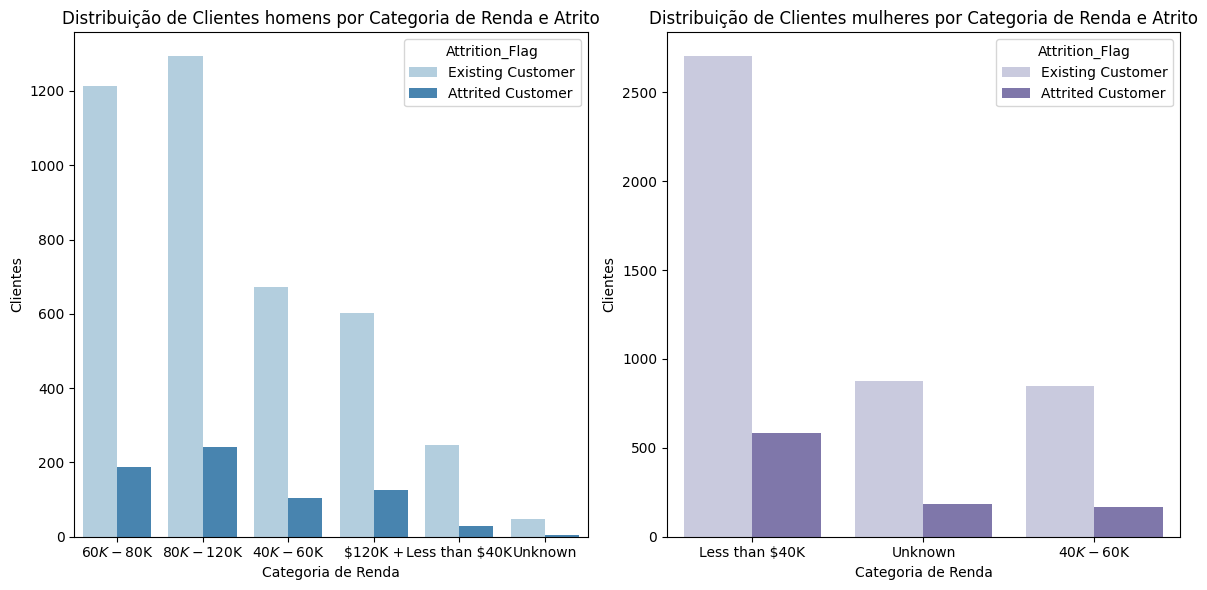

In [36]:
# Criar histogramas
plt.figure(figsize=(12, 6))

# Criando o subplot na primeira posição da matriz
plt.subplot(1, 2, 1)

sns.countplot( data=df_homens, x='Income_Category', hue='Attrition_Flag', palette='Blues')
plt.title('Distribuição de Clientes homens por Categoria de Renda e Atrito')
plt.xlabel('Categoria de Renda')
plt.ylabel('Clientes')


# Criando o subplot na segunda posição da matriz
plt.subplot(1, 2, 2)

sns.countplot( data=df_mulheres, x='Income_Category', hue='Attrition_Flag', palette='Purples')
plt.title('Distribuição de Clientes mulheres por Categoria de Renda e Atrito')
plt.xlabel('Categoria de Renda')
plt.ylabel('Clientes')

# Mostrando o subplot
plt.tight_layout()
plt.show()


Distribuição de Clientes por Categoria de Cartão de Crédito e Atrito

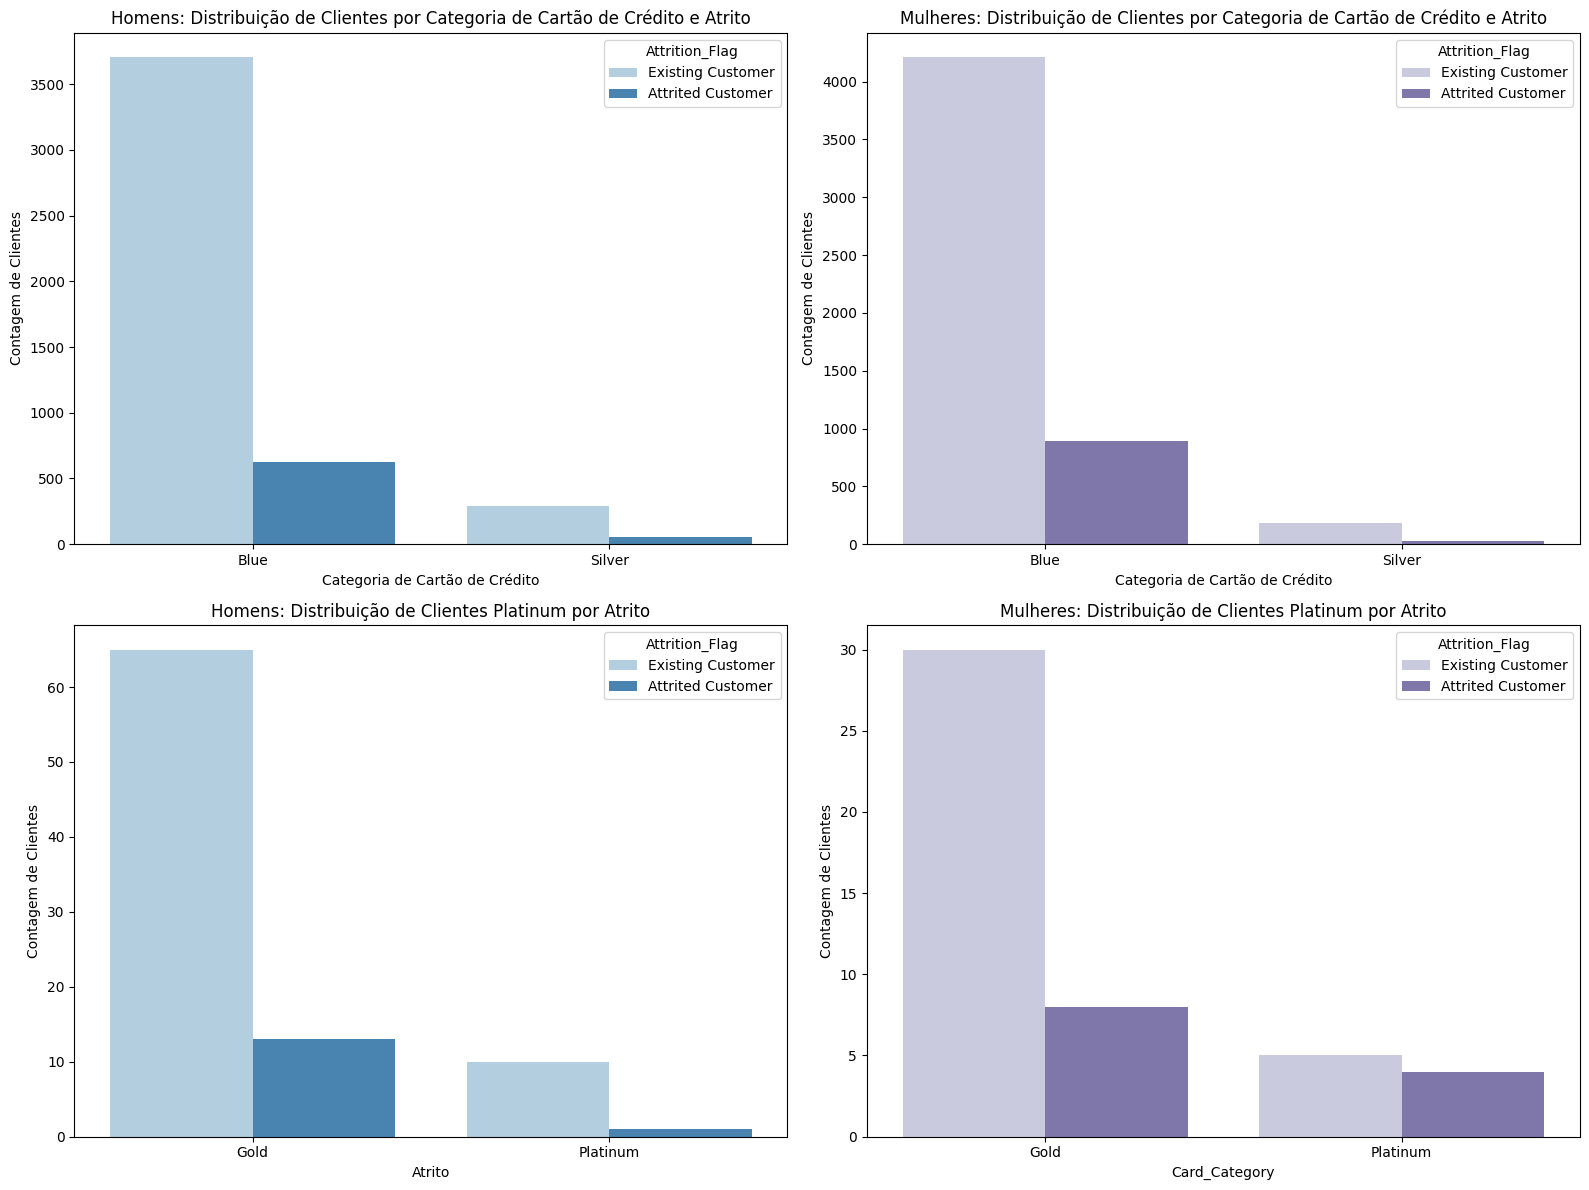

In [17]:
# Criar histogramas
plt.figure(figsize=(16, 12))

# Criando o subplot na primeira posição da matriz
plt.subplot(2, 2, 1)

# Criando um histograma com a categoria do cartão pelos clientes masculinos
sns.countplot(data=df_homens[(df_homens['Card_Category'] != 'Platinum') & (df_homens['Card_Category'] != 'Gold')], x='Card_Category', hue='Attrition_Flag', palette='Blues')
plt.title('Homens: Distribuição de Clientes por Categoria de Cartão de Crédito e Atrito')
plt.xlabel('Categoria de Cartão de Crédito')
plt.ylabel('Contagem de Clientes')

# Criando o subplot na segunda posição da matriz
plt.subplot(2, 2, 2)

# Criando um histograma com a categoria do cartão pelos clientes femininos
sns.countplot(data=df_mulheres[(df_mulheres['Card_Category'] != 'Platinum') & (df_mulheres['Card_Category'] != 'Gold')], x='Card_Category', hue='Attrition_Flag', palette='Purples')
plt.title('Mulheres: Distribuição de Clientes por Categoria de Cartão de Crédito e Atrito')
plt.xlabel('Categoria de Cartão de Crédito')
plt.ylabel('Contagem de Clientes')

# Criando o subplot para os clientes masculinos sobre a coluna platinum
plt.subplot(2, 2, 3)
sns.countplot(data=df_homens[(df_homens['Card_Category'] != 'Blue') & (df_homens['Card_Category'] != 'Silver')], x='Card_Category', hue='Attrition_Flag', palette='Blues')
plt.title('Homens: Distribuição de Clientes Platinum por Atrito')
plt.xlabel('Atrito')
plt.ylabel('Contagem de Clientes')

# Criando o subplot para os clientes femininos sobre a coluna platinum
plt.subplot(2, 2, 4)
sns.countplot(data=df_mulheres[(df_mulheres['Card_Category'] != 'Blue') & (df_mulheres['Card_Category'] != 'Silver')], x='Card_Category', hue='Attrition_Flag', palette='Purples')
plt.title('Mulheres: Distribuição de Clientes Platinum por Atrito')
plt.ylabel('Contagem de Clientes')

# Mostrando o subplot
plt.tight_layout()
plt.show()

Distribuição de clientes por atrito

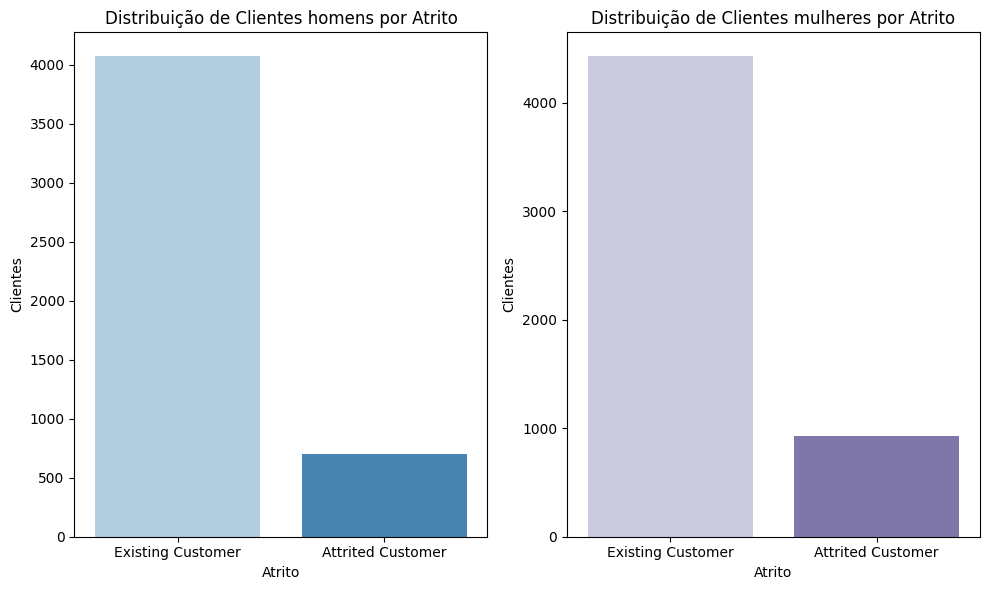

In [20]:
# Criar histogramas
plt.figure(figsize=(10, 6))

# Criando o primeiro subplot
plt.subplot(1, 2, 1)
sns.countplot(data=df_homens, x='Attrition_Flag', hue='Attrition_Flag', palette='Blues')
plt.title('Distribuição de Clientes homens por Atrito')
plt.xlabel('Atrito')
plt.ylabel('Clientes')

# Criando o segundo subplot
plt.subplot(1, 2, 2)
sns.countplot(data=df_mulheres, x='Attrition_Flag', hue='Attrition_Flag', palette='Purples')
plt.title('Distribuição de Clientes mulheres por Atrito')
plt.xlabel('Atrito')
plt.ylabel('Clientes')

# Mostrando o subplot
plt.tight_layout()
plt.show()


### Análise sobre os clientes com base na coluna Attrition_Flag	 (Geral)

In [ ]:
plt.figure(figsize=(16, 12))

# Criando o subplot 1
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', palette='Greens')
plt.title('Distribuição de Clientes por Categoria de Renda e Atrito')
plt.xlabel('Categoria de Renda')
plt.ylabel('Clientes')
plt.xticks(rotation=45)

# Criando o subplot 2
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag', palette='Oranges')
plt.title('Distribuição de Clientes por Categoria de Cartão de Crédito e Atrito')
plt.xlabel('Categoria de Cartão de Crédito')
plt.ylabel('Clientes')

# Criando o subplot 3
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Attrition_Flag', hue='Attrition_Flag', palette='Blues')
plt.title('Distribuição de Clientes por Atrito')
plt.xlabel('Atrito')
plt.ylabel('Clientes')

plt.tight_layout()
plt.show()

### Leo

<p>Homens x Mulheres - Categoria de cartões</p>

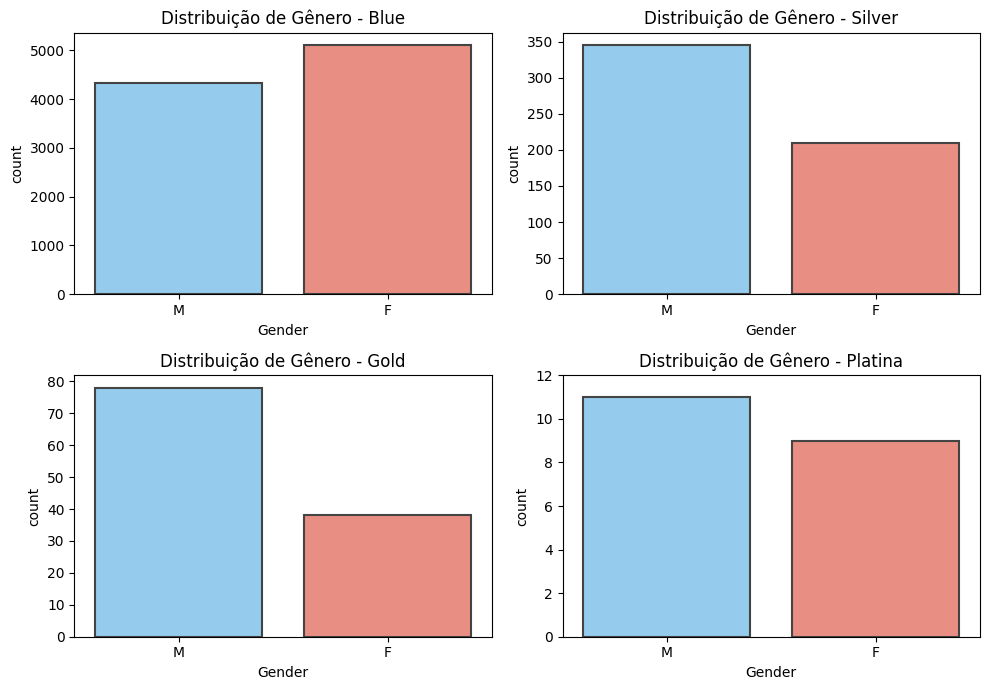

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

gender_palette = {'M': '#87CEFA', 'F': '#FA8072'}

cor_borda = '#444444'
tamanho_cor = 1.5

sns.countplot(x='Gender', hue='Gender', data=df[df['Card_Category'] == 'Blue'], ax=axes[0, 0], order=['M', 'F'], palette=gender_palette, edgecolor = cor_borda, linewidth = tamanho_cor)
axes[0, 0].set_title('Distribuição de Gênero - Blue')

sns.countplot(x='Gender', hue='Gender', data=df[df['Card_Category'] == 'Silver'], ax=axes[0, 1], order=['M', 'F'], palette=gender_palette, edgecolor = cor_borda, linewidth = tamanho_cor)
axes[0, 1].set_title('Distribuição de Gênero - Silver')

sns.countplot(x='Gender', hue='Gender', data=df[df['Card_Category'] == 'Gold'], ax=axes[1, 0], order=['M', 'F'], palette=gender_palette, edgecolor = cor_borda, linewidth = tamanho_cor)
axes[1, 0].set_title('Distribuição de Gênero - Gold')

sns.countplot(x='Gender', hue='Gender', data=df[df['Card_Category'] == 'Platinum'], ax=axes[1, 1], order=['M', 'F'], palette=gender_palette, edgecolor = cor_borda, linewidth = tamanho_cor)
axes[1, 1].set_title('Distribuição de Gênero - Platina')

max_count_platina = df[df['Card_Category'] == 'Platinum']['Gender'].value_counts().max()
axes[1, 1].set_ylim(0, max_count_platina + 1)

plt.tight_layout()
plt.show()


<p>Histograma para a Variável Education_Level
</p>

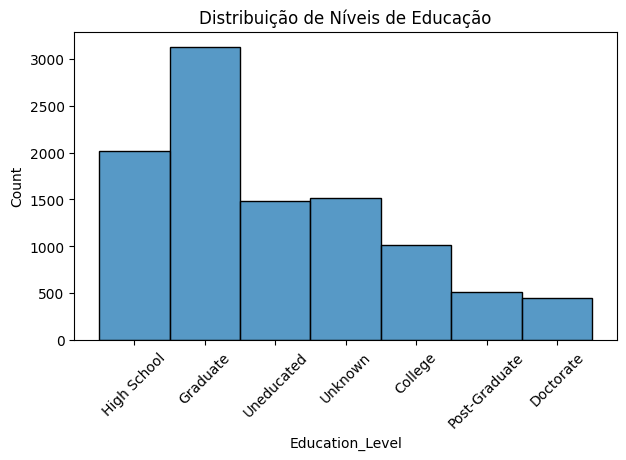

In [43]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Education_Level'], kde=False, bins=len(df['Education_Level'].unique()))
plt.title('Distribuição de Níveis de Educação')
plt.xticks(rotation=45)
plt.show()

<p>BoxPlots</p>

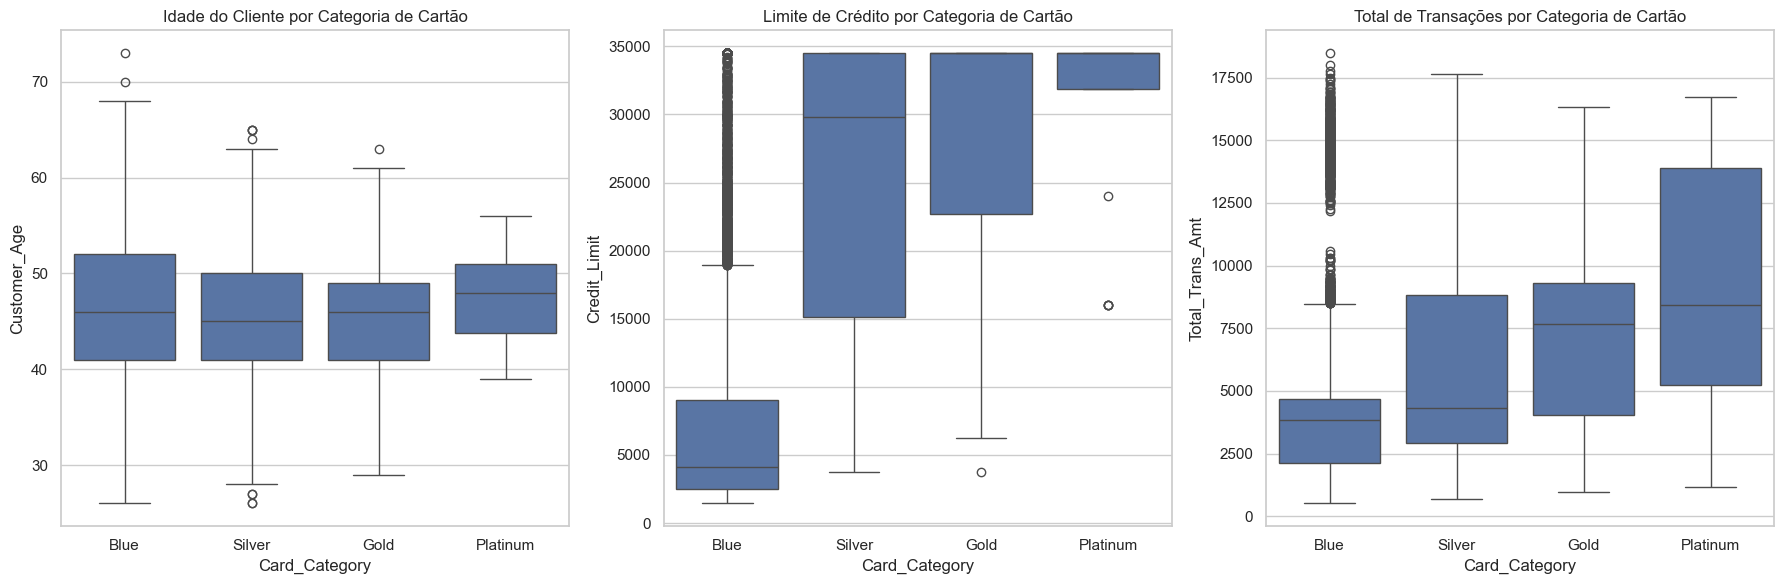

In [44]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para Idade do Cliente
sns.boxplot(x='Card_Category', y='Customer_Age', data=df, ax=axes[0], order=['Blue', 'Silver', 'Gold', 'Platinum'])
axes[0].set_title('Idade do Cliente por Categoria de Cartão')

# Boxplot para Limite de Crédito
sns.boxplot(x='Card_Category', y='Credit_Limit', data=df, ax=axes[1], order=['Blue', 'Silver', 'Gold', 'Platinum'])
axes[1].set_title('Limite de Crédito por Categoria de Cartão')

# Boxplot para Total de Transações
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df, ax=axes[2], order=['Blue', 'Silver', 'Gold', 'Platinum'])
axes[2].set_title('Total de Transações por Categoria de Cartão')

plt.tight_layout()
plt.show()


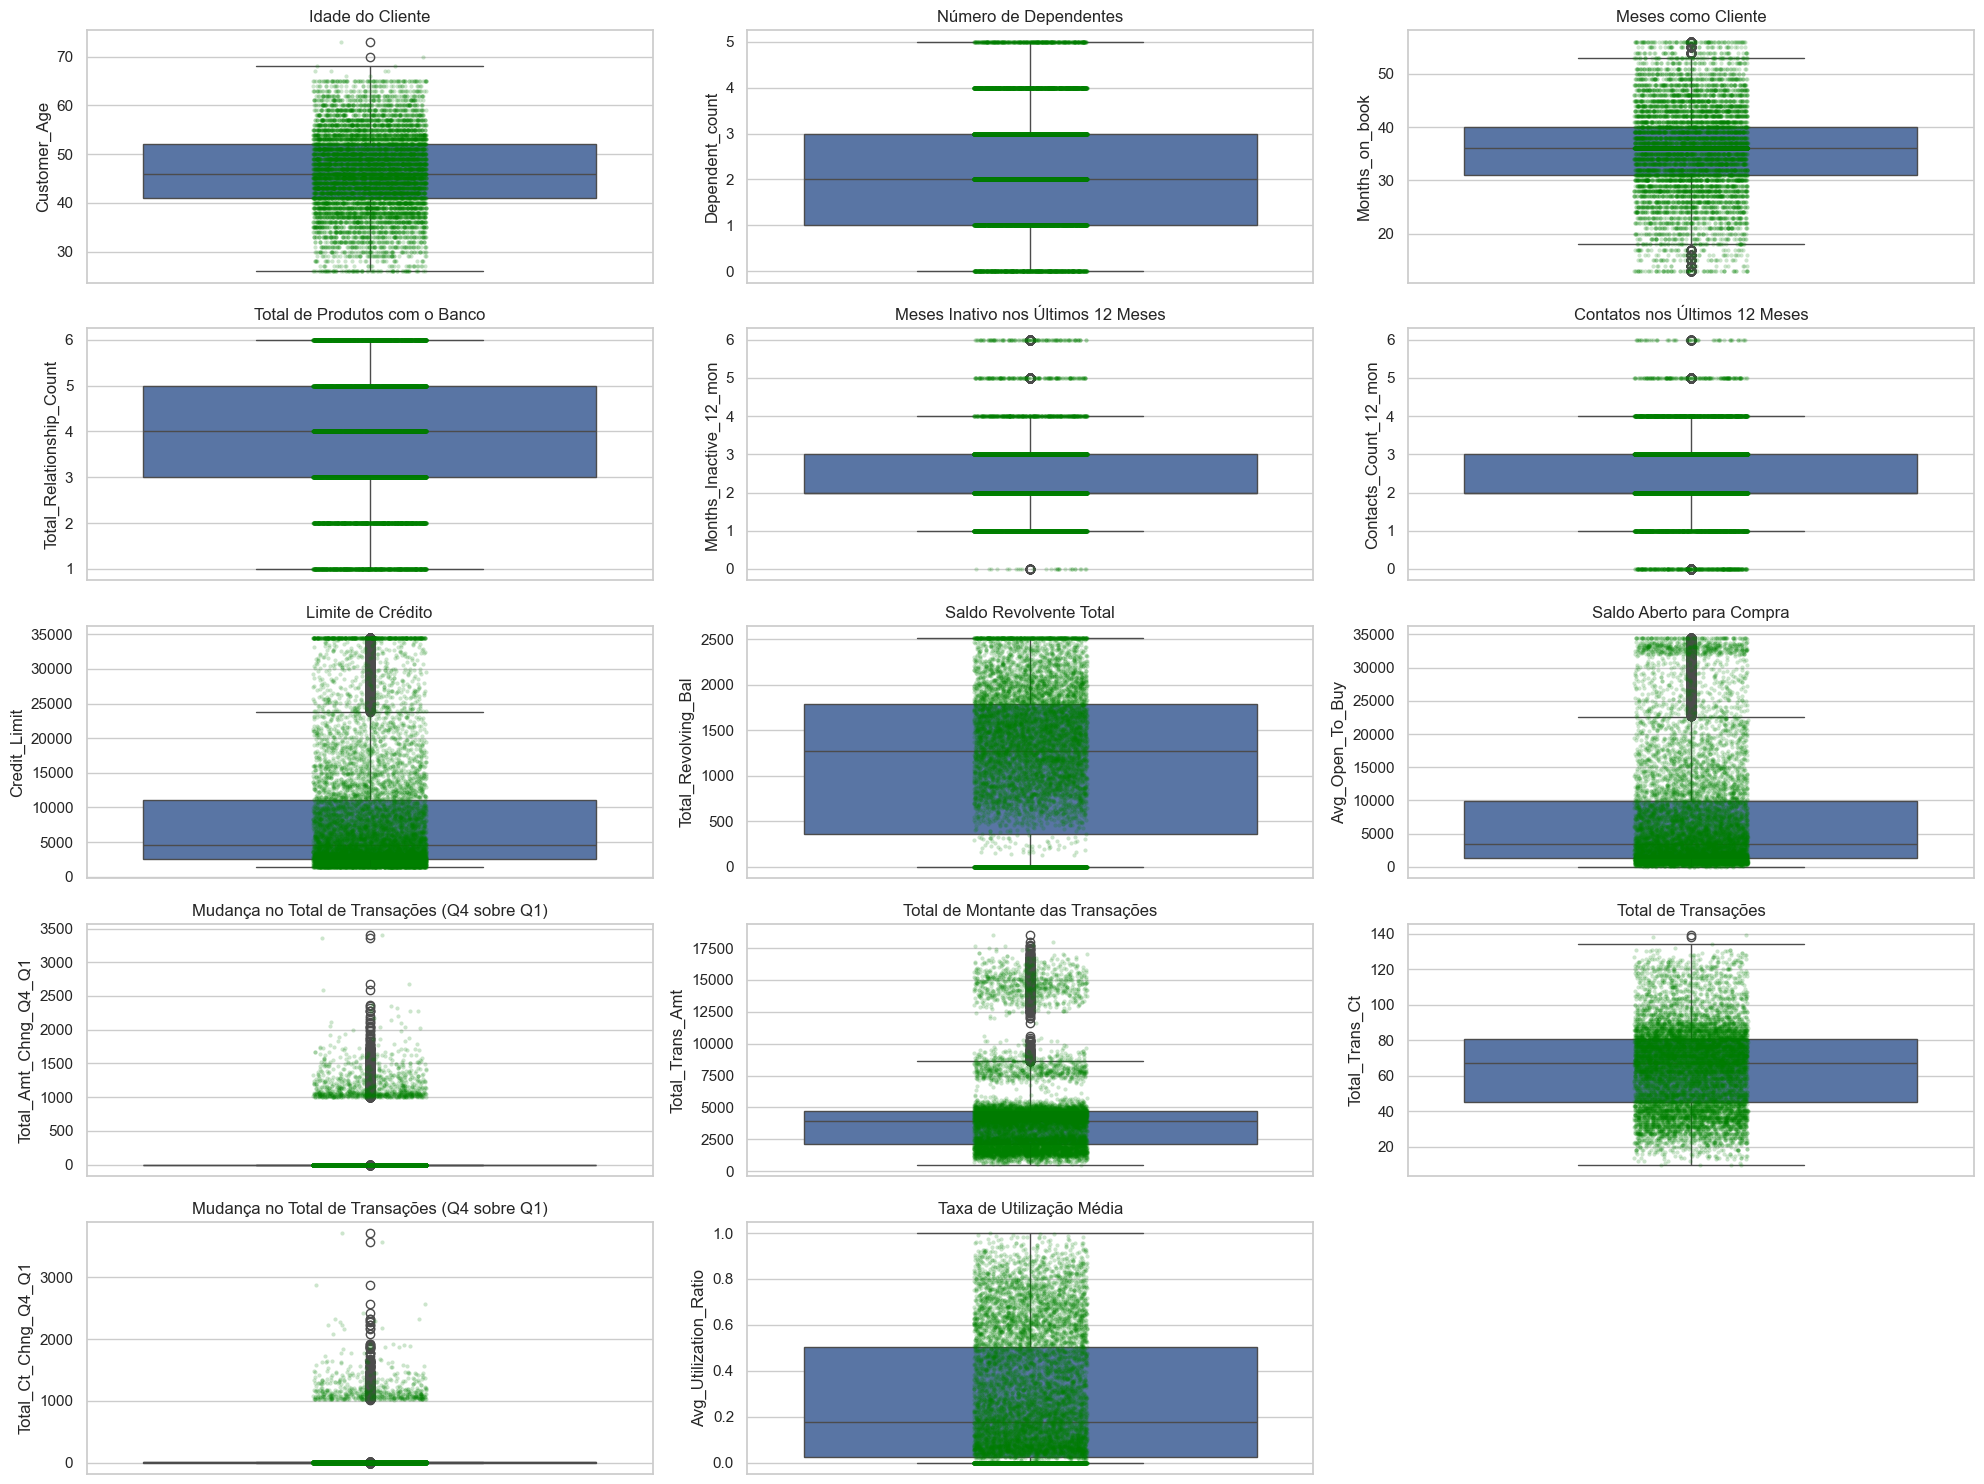

In [45]:
# variáveis quantitativas para os boxplots
variaveis_quantitativas = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                           'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                           'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# títulos para cada variável
titulos = ['Idade do Cliente', 'Número de Dependentes', 'Meses como Cliente', 'Total de Produtos com o Banco', 'Meses Inativo nos Últimos 12 Meses',
           'Contatos nos Últimos 12 Meses', 'Limite de Crédito', 'Saldo Revolvente Total', 'Saldo Aberto para Compra', 'Mudança no Total de Transações (Q4 sobre Q1)',
           'Total de Montante das Transações', 'Total de Transações', 'Mudança no Total de Transações (Q4 sobre Q1)', 'Taxa de Utilização Média']

# definindo o tamanho dos boxplots pra caber na tela
plt.figure(figsize=(20, 15))

# for pra criar um boxplot pra casa variavel
for i, (var_quant, titulo) in enumerate(zip(variaveis_quantitativas, titulos), 1):
    plt.subplot(5, 3, i)  # "calcula" onde vai add o boxplot
    sns.boxplot(y=df[var_quant])  # cria o boxplot pra variavel que esta no momento
    sns.stripplot(y=df[var_quant], color='green', alpha=0.2, size=3)  # Adiciona o stripplot sobre o boxplot
    plt.title(titulo)

plt.tight_layout()
plt.show()

<p>Cálculo de Média, Moda e Mediana para Variáveis Quantitativas</p>


In [46]:
# Variaveis usadas pro calculo
variaveis_analise = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
resultados = {}

for val_max_perda_fin in variaveis_analise:
    resultados[val_max_perda_fin] = {
        'Média': round(df[val_max_perda_fin].mean(), 2),
        'Moda': df[val_max_perda_fin].mode()[0], # pegando apenas a primeira moda( pode ter mais de uma)
        'Mediana': df[val_max_perda_fin].median()
    }

resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


                   Média     Moda  Mediana
Customer_Age       46.33     44.0     46.0
Credit_Limit     8631.95  34516.0   4549.0
Total_Trans_Amt  4404.09   4253.0   3899.0


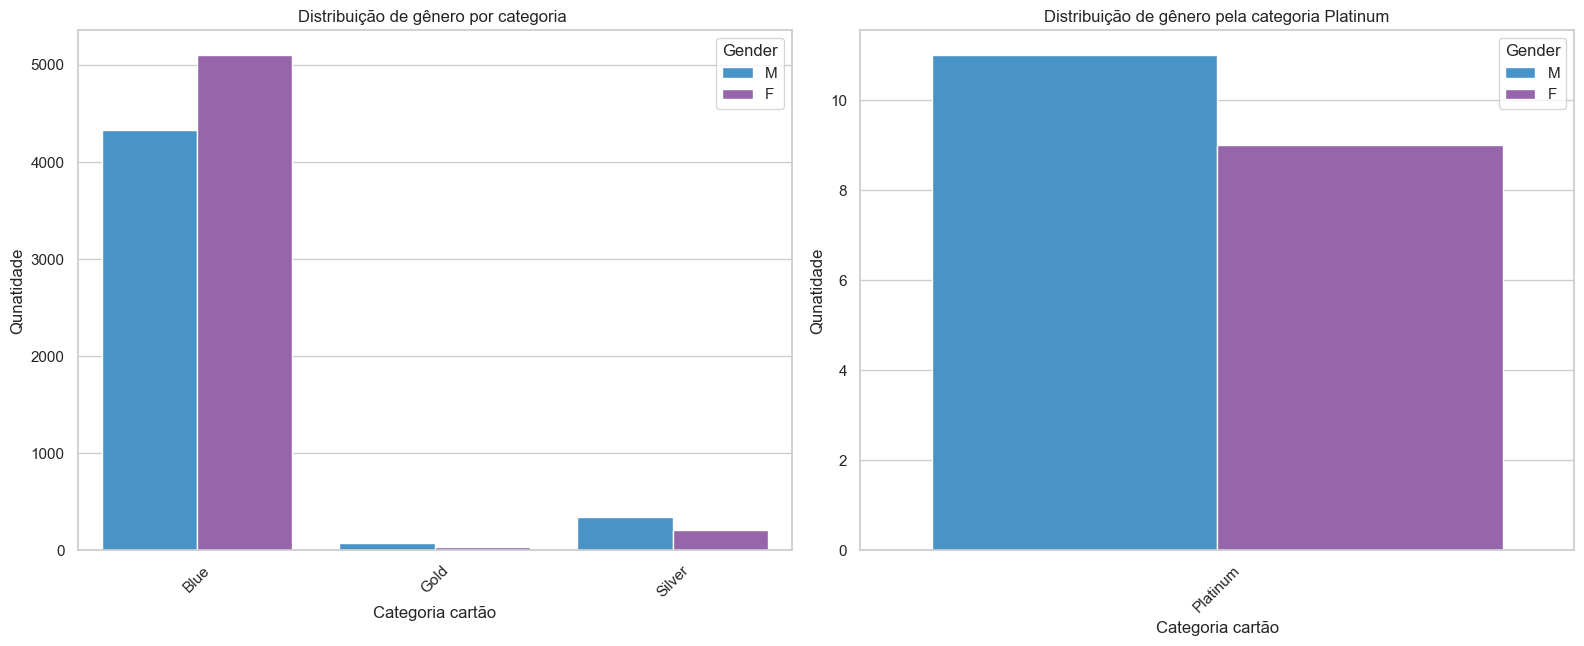

In [48]:
df_no_plat = df[df['Card_Category'] != 'Platinum']
df_in_plat = df[df['Card_Category'] == 'Platinum']
plt.figure(figsize=(16, 12))
colors = ["#3498db", "#9b59b6"] 

# Aplicando a paleta de cores
sns.set_palette(sns.color_palette(colors))

# Criando o subplot 1
plt.subplot(2, 2, 1)
sns.countplot(data=df_no_plat, x='Card_Category', hue='Gender')
plt.title('Distribuição de gênero por categoria ')
plt.xlabel('Categoria cartão')
plt.ylabel('Qunatidade')
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
sns.set_palette(sns.color_palette(colors))

sns.countplot(data=df_in_plat, x='Card_Category', hue='Gender')
plt.title('Distribuição de gênero pela categoria Platinum')
plt.xlabel('Categoria cartão')
plt.ylabel('Qunatidade')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

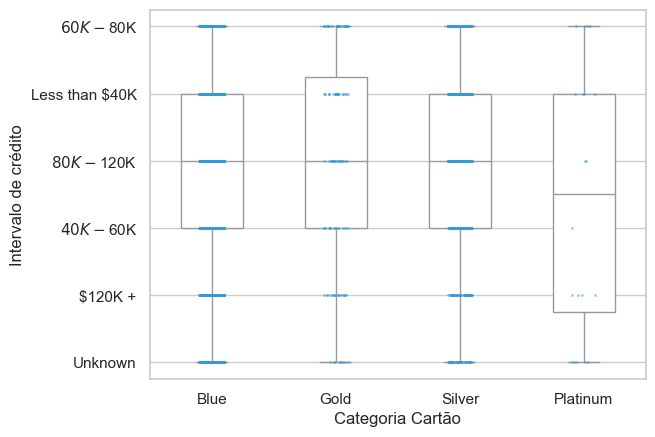

In [49]:
sns.boxplot(data=df, x='Card_Category', y='Income_Category', width=0.5, color='white')
sns.stripplot(data=df,x='Card_Category', y='Income_Category', alpha=0.5, size=2)
plt.xlabel('Categoria Cartão')
plt.ylabel('Intervalo de crédito')
plt.show()